In [1]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from matplotlib import animation
from IPython.display import HTML

In [2]:
from agent import Agent
from high_level_policy import HCBS
from map_handler import Map
from node import GridNode

In [3]:
height = 15
width = 30
mapstr = '''
# . . # 
. . . .  
. . . . 
# . . # 
'''
agent1 = Agent(0, 1, 3, 2)
agent2 = Agent(1, 0, 2, 3)


In [8]:
def draw(grid_map, agents=None, solution=None, nodesExpanded=None, nodesOpened=None):
    
    if solution is not None:
        fig = plt.figure()
        images = []
        # Assign different collor for different agents:
        collors = [tuple(np.random.randint(0, 255, 3)) for i in range(len(agents))]
        for t in range(max(map(lambda x: len(x[0]), solution.values()))):
            k = 5
            hIm = grid_map.height * k
            wIm = grid_map.width * k
            im = Image.new('RGB', (wIm, hIm), color = 'white')
            draw = ImageDraw.Draw(im)

            for i in range(grid_map.height):
                for j in range(grid_map.width):
                    if(grid_map.cells[i][j] == 1):
                        draw.rectangle((j * k, i * k, (j + 1) * k - 1, (i + 1) * k - 1), fill=( 70, 80, 80 ))

            for i, (path, length) in enumerate(solution.values()):
                step = path[min(t, len(path) - 1)]
                if (grid_map.traversable(step.i, step.j)):
                    draw.rectangle((step.j * k, step.i * k, (step.j + 1) * k - 1, (step.i + 1) * k - 1), fill=collors[i], width=0)
                else:
                    draw.rectangle((step.j * k, step.i * k, (step.j + 1) * k - 1, (step.i + 1) * k - 1), fill=(230, 126, 34), width=0)

            for i, agent in enumerate(agents):
                start = GridNode(agent.start_i, agent.start_j)
                goal = GridNode(agent.goal_i, agent.goal_j)
                if (start is not None) and (grid_map.traversable(start.i, start.j)):
                    draw.rectangle((start.j * k + 1, start.i * k + 1, (start.j + 1) * k - 2, (start.i + 1) * k - 2), fill=collors[i], width=0)

                if (goal is not None) and (grid_map.traversable(goal.i, goal.j)):
                    draw.rectangle((goal.j * k + 1, goal.i * k + 1, (goal.j + 1) * k - 2, (goal.i + 1) * k - 2), fill=collors[i], width=0)
            
#             fig, ax = plt.subplots(dpi=150)
#             ax.axes.xaxis.set_visible(False)
#             ax.axes.yaxis.set_visible(False)
#             plt.imshow(im, animated=True)
            img = plt.imshow(im, animated=True)
#             print(img)
            images.append([img])
        ani = animation.ArtistAnimation(fig, images, interval=400, blit=True, repeat_delay=100)
        HTML(ani.to_html5_video())
        print("Solution was found, cost = ", sum([el[1] for el in solution.values()]))
        return ani
    else:
        k = 5
        hIm = grid_map.height * k
        wIm = grid_map.width * k
        im = Image.new('RGB', (wIm, hIm), color = 'white')
        draw = ImageDraw.Draw(im)

        for i in range(grid_map.height):
            for j in range(grid_map.width):
                if(grid_map.cells[i][j] == 1):
                    draw.rectangle((j * k, i * k, (j + 1) * k - 1, (i + 1) * k - 1), fill=( 70, 80, 80 ))
        
        for agent in agents:
            start = GridNode(agent.start_i, agent.start_j)
            goal = GridNode(agent.goal_i, agent.goal_j)
            if (start is not None) and (grid_map.traversable(start.i, start.j)):
                draw.rectangle((start.j * k, start.i * k, (start.j + 1) * k - 1, (start.i + 1) * k - 1), fill=(40, 180, 99), width=0)

            if (goal is not None) and (grid_map.traversable(goal.i, goal.j)):
                draw.rectangle((goal.j * k, goal.i * k, (goal.j + 1) * k - 1, (goal.i + 1) * k - 1), fill=(231, 76, 60), width=0)

        fig, ax = plt.subplots(dpi=150)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.imshow(np.asarray(im))

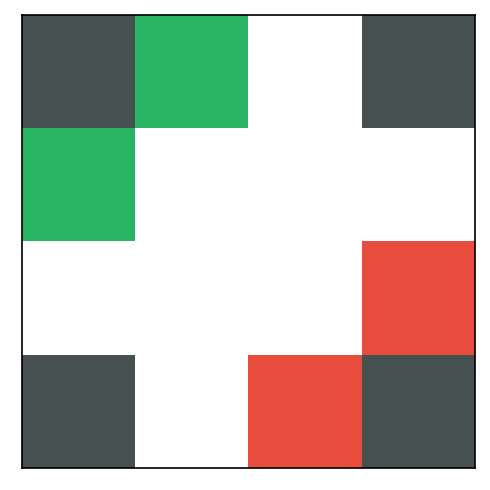

In [9]:
test_map = Map()
test_map.read_from_string(mapstr, 4, 4)
draw(test_map, [agent1, agent2])

In [10]:
def SimpleTest(SearchFunction, height, width, mapstr, agents, **kwargs):
    task_map = Map()
    task_map.read_from_string(mapstr, width, height, diagonal_movements=False)

    solution = SearchFunction(task_map, agents, **kwargs)
    anim = draw(task_map, [agent1, agent2], solution)
    return anim
#         if result[0]:
#             path = MakePath(result[1])
#             correct = abs(path[1] - pathLen) < EPS
#             print("Path found! Length: " + str(path[1]) + ". Nodes created: " + str(nodesCreated) + ". Number of steps: " + str(numSteps) + ". Optimal: " + str(correct))
#         else:
#             print("Path not found!")
#     except Exception as e:
#         print("Execution error")
#         print(e)

Solution was found, cost =  9


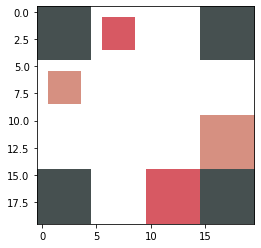

In [11]:
from low_level_policy import manhattan_distance

anim = SimpleTest(HCBS, 4, 4, mapstr, [agent1, agent2], heuristic_function=manhattan_distance)

In [12]:
HTML(anim.to_html5_video())